# Зайцев Н. ПИ20-1В

<h1 align='center'>  Использование TensorBoard в PyTorch</h1>

Вы можете ознакомиться с работой этого кода на [`youtube`](https://www.youtube.com/watch?v=6CEld3hZgqc).

.. raw:: html

   <div style="margin-top:10px; margin-bottom:10px;">
     <iframe width="560" height="315" src="https://www.youtube.com/embed/6CEld3hZgqc" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>
   </div>

Установка TensorBoard
----------------

Чтобы запустить этот код, вам потребуется установить PyTorch, TorchVision, Matplotlib и TensorBoard.

При помощи `conda`:

`!conda install pytorch torchvision -c pytorch`
`!conda install matplotlib tensorboard`

При помощи `pip`:

`!pip install torch torchvision matplotlib tensorboard`

Как только зависимости будут установлены, перезапустите этот ноутбук в
среде Python, в которой вы их установили.

Введение
------------ 
В этом блокноте мы будем тренировать вариант LeNet-5 по набору данных Fashion-MNIST. Fashion-MNIST - это набор изображений различных предметов одежды, с десятью этикетками классов, указывающими тип изображенной одежды.

In [1]:
# нужно для моделей и их обучения в PyTorch
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# Наборы изображений и их преобразование
import torchvision
import torchvision.transforms as transforms

# отображение и операции с матрицами
import matplotlib.pyplot as plt
import numpy as np

# использование TensorBoard в PyTorch 
from torch.utils.tensorboard import SummaryWriter
%load_ext tensorboard

2023-06-19 23:33:02.598145: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Изображения в TensorBoard
-----------------------------
Давайте начнем с добавления образцов изображений из нашего набора данных в TensorBoard:

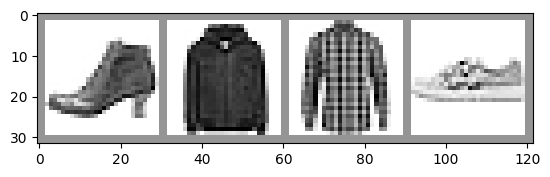

In [2]:
# Собирайте наборы данных и готовьте их к использованию
transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))])

# Храните отдельные выборки для обучения и проверки в ./data
training_set = torchvision.datasets.FashionMNIST('./data',
    download=True,
    train=True,
    transform=transform)
validation_set = torchvision.datasets.FashionMNIST('./data',
    download=True,
    train=False,
    transform=transform)

training_loader = torch.utils.data.DataLoader(training_set,
                                              batch_size=4,
                                              shuffle=True,
                                              num_workers=2)


validation_loader = torch.utils.data.DataLoader(validation_set,
                                                batch_size=4,
                                                shuffle=False,
                                                num_workers=2)

# Метки классов
classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
        'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot')

# Функция, способствующая просмотру изображений
def matplotlib_imshow(img, one_channel=False):
    if one_channel:
        img = img.mean(dim=0)
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    if one_channel:
        plt.imshow(npimg, cmap="Greys")
    else:
        plt.imshow(np.transpose(npimg, (1, 2, 0)))

# Извлечение пакета 4 изображений
dataiter = iter(training_loader)
images, labels = next(dataiter)

# Создание решетки изображений и их отображение
img_grid = torchvision.utils.make_grid(images)
matplotlib_imshow(img_grid, one_channel=True)

Выше мы использовали Torch Vision и Matplotlib для создания визуальной сетки
мини-пакета наших входных данных. Ниже мы используем вызов `add_image()` для
`SummaryWriter`, чтобы записать изображение для использования TensorBoard, и
мы также вызываем `flush()`, чтобы убедиться, что оно сразу записано на диск.

In [5]:
# Аргумент log_dir по умолчанию - "runs", но хорошо бы чтоб он был конкретным
# torch.utils.tensorboard.SummaryWriter импортирован выше
writer = SummaryWriter('runs/fashion_mnist_experiment_1')

# Запись данных изображения в log dir TensorBoard
writer.add_image('Four Fashion-MNIST Images', img_grid)
writer.flush()

# To view, start TensorBoard on the command line with:
#   tensorboard --logdir=runs
# ...and open a browser tab to http://localhost:6006/

In [20]:
%tensorboard --logdir runs

Reusing TensorBoard on port 6006 (pid 10916), started 0:11:01 ago. (Use '!kill 10916' to kill it.)

Если вы запустите TensorBoard в командной строке и откроете его на новой вкладке браузера (обычно на [`localhost:6006`](http://localhost:6006), вы должны увидеть сетку изображений на вкладке IMAGES.

## Задание 1
Выполните загрузку данных из набора данных MNIST и проведите эксперимент по визуализации данных в Tensorboard.

In [7]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.tensorboard import SummaryWriter

In [8]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,), (0.5,))])

In [9]:
trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                      download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='./data', train=False,
                                     download=True, transform=transform)

In [10]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32,
                                          shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=32,
                                         shuffle=False, num_workers=2)

In [11]:
def visualize_data(writer, loader, name):
    dataiter = iter(loader)
    images, labels = next(dataiter)
    img_grid = torchvision.utils.make_grid(images)
    writer.add_image(name, img_grid)

In [12]:
writer = SummaryWriter()
visualize_data(writer, trainloader, "Training data")
visualize_data(writer, testloader, "Test data")
writer.close()

Построение графиков скаляров для визуализации обучения
--------------------------------------

TensorBoard полезна для отслеживания прогресса и эффективности вашего
обучения. Ниже мы запустим цикл обучения, отследим некоторые показатели и сохраним
данные для использования TensorBoard.

Давайте определим модель для классификации наших изображений, а также оптимизатор и
функцию ошибки для обучения:

In [13]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 4 * 4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    

net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

Теперь давайте обучим одну эпоху и оценим
потери набора обучения и проверки каждые 1000 пакетов:

In [14]:
print(len(validation_loader))
for epoch in range(1): 
    running_loss = 0.0

    for i, data in enumerate(training_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 1000 == 999:
            print('Batch {}'.format(i + 1))
            running_vloss = 0.0
            
            net.train(False)
            for j, vdata in enumerate(validation_loader, 0):
                vinputs, vlabels = vdata
                voutputs = net(vinputs)
                vloss = criterion(voutputs, vlabels)
                running_vloss += vloss.item()
            net.train(True)
            
            avg_loss = running_loss / 1000
            avg_vloss = running_vloss / len(validation_loader)
            
            writer.add_scalars('Training vs. Validation Loss',
                            { 'Training' : avg_loss, 'Validation' : avg_vloss },
                            epoch * len(training_loader) + i)

            running_loss = 0.0
print('Finished Training')

writer.flush()

2500
Batch 1000
Batch 2000
Batch 3000
Batch 4000
Batch 5000
Batch 6000
Batch 7000
Batch 8000
Batch 9000
Batch 10000
Batch 11000
Batch 12000
Batch 13000
Batch 14000
Batch 15000
Finished Training


Переключитесь на открытую TensorBoard и посмотрите на вкладку SCALARS. 

## Задание 2
Выполните классификацию данных MNIST описанной выше моделью и продолжите визуализацию обучения модели для эксперимента из Задания 1. 

In [16]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 4 * 4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    

net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [17]:
from torch.utils.tensorboard import SummaryWriter

writer = SummaryWriter()

for epoch in range(10):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = nn.functional.cross_entropy(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 1000 == 999:
            running_loss = 0.0

    val_loss = 0.0
    with torch.no_grad():
        for data in testloader:
            inputs, labels = data
            outputs = net(inputs)
            val_loss += nn.functional.cross_entropy(outputs, labels).item()
    val_loss /= len(testloader)
    print(f"Epoch [{epoch + 1}] training loss: {running_loss / 1000:.3f}, validation loss: {val_loss:.3f}")

    writer.add_scalars('Train. vs. Val. Loss - MNIST Classification',
                { 'Training' : running_loss / 1000, 'Validation' : val_loss },
                epoch * len(trainloader) + i)

writer.close()

Epoch [1] training loss: 0.562, validation loss: 0.259
Epoch [2] training loss: 0.123, validation loss: 0.127
Epoch [3] training loss: 0.084, validation loss: 0.087
Epoch [4] training loss: 0.067, validation loss: 0.060
Epoch [5] training loss: 0.053, validation loss: 0.055
Epoch [6] training loss: 0.049, validation loss: 0.045
Epoch [7] training loss: 0.046, validation loss: 0.044
Epoch [8] training loss: 0.041, validation loss: 0.038
Epoch [9] training loss: 0.038, validation loss: 0.039
Epoch [10] training loss: 0.035, validation loss: 0.037


Визуализация модели
----------------------

TensorBoard также можно использовать для изучения потока данных в вашей модели.
Для этого вызовите метод `add_graph()` с вводом модели и образца. Когда вы открываете



In [18]:
# Опять же, возьмите один мини-пакет изображений
dataiter = iter(training_loader)
images, labels =  next(dataiter)

# add_graph() будет отслеживать ввод образца через вашу модель,
# и визуализируйте его в виде графика.
writer.add_graph(net, images)
writer.flush()

Когда вы переключитесь на TensorBoard, вы должны увидеть вкладку GRAPHS. Дважды щелкните узел “NET”, чтобы увидеть слои и поток данных в вашей модели.

Визуализация Вашего набора данных с помощью Embeddings
----------------------------------------
Изображения с разрешением 28 на 28, которые мы используем, могут быть смоделированы как 784-мерные векторы (28\*28 = 784). Может быть поучительно спроецировать это на представление в более
низком измерении. Метод `add_embedding()` проецирует набор данных на три измерения с наибольшей дисперсией и отображает их в виде интерактивной 3D-диаграммы. Функция `add_embedding()`
метод делает это автоматически, проецируя в три измерения
с наибольшей дисперсией.

Ниже мы возьмем образец наших данных и создадим такое вложение:

In [19]:
# Select a random subset of data and corresponding labels
def select_n_random(data, labels, n=100):
    assert len(data) == len(labels)

    perm = torch.randperm(len(data))
    return data[perm][:n], labels[perm][:n]

# Extract a random subset of data
images, labels = select_n_random(training_set.data, training_set.targets)

# get the class labels for each image
class_labels = [classes[label] for label in labels]

# log embeddings
features = images.view(-1, 28 * 28)
writer.add_embedding(features,
                    metadata=class_labels, global_step=1,
                    label_img=images.unsqueeze(1))
writer.flush()
#writer.close()

На сегодняшний день функция перестала работать `add_embedding()`. Будем надеяться, что это явление временное. При работе функции, если вы переключитесь на TensorBoard и выберете вкладку PROJECTOR, вы увидите 3D-представление проекции. Вы можете поворачивать и масштабировать модель. Изучите его в больших и малых масштабах и посмотрите, сможете ли вы обнаружить закономерности в проецируемых данных и кластеризации меток. В принципе проектор можно создать и средствами библиотеки `Tensorflow`.

Для лучшей видимости рекомендуется:

- Выберите “label” в раскрывающемся списке “Color by” слева.
- Переключите значок ночного режима вверху, чтобы разместить светлые изображения на темном фоне.

Другие ссылки
---------------

Для получения дополнительной информации ознакомьтесь с:

- PyTorch документация [`torch.utils.tensorboard.SummaryWriter`](https://pytorch.org/docs/stable/tensorboard.html?highlight=summarywriter)
- Tensorboard обучающий материал [`PyTorch.org Tutorials`](https://pytorch.org/tutorials/)
- Для большей информации по TensorBoard, см. [`TensorBoard
  documentation`](https://www.tensorflow.org/tensorboard)

